# Commodity Prices

## Outline

For more than half of all countries around the globe, [commodities](https://en.wikipedia.org/wiki/Commodity) account for [the majority of total exports](https://unctad.org/publication/commodities-and-development-report-2019).

Examples of commodities include copper, diamonds, iron ore, lithium, cotton
and coffee beans.

In this lecture we give an introduction to the theory of commodity prices.

The lecture is quite advanced relative to other lectures in this series.

We need to compute an equilibrium, and that equilibrium is described by a
price function.

We will solve an equation where the price function is the unknown.

This is harder than solving an equation for an unknown number, or vector.

The lecture will discuss one way to solve a [functional equation](https://en.wikipedia.org/wiki/Functional_equation) (an equation where the unknown object is a function).

For this lecture we need the `yfinance` library.

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.0 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.5 MB/s eta 0:00:00


  Installing build dependencies ... -

 \

 |

 /

 done


  Getting requirements to build wheel ... - done


  Preparing metadata (pyproject.toml) ... -

 done


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 19.8 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 24.2 MB/s eta 0:00:00


 \

 |

 done
  Created wheel for peewee: filename=peewee-3.17.6-cp311-cp311-linux_x86_64.whl size=274782 sha256=7c580a841dd6564e5c188b2800182a3754f7b0926bd5d117f475015c1cdc5a3c
  Stored in directory: /home/runner/.cache/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee


We will use the following imports

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from scipy.stats import beta

## Data

The figure below shows the price of cotton in USD since the start of 2016.

In [3]:
s = yf.download('CT=F', '2016-1-1', '2023-4-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed

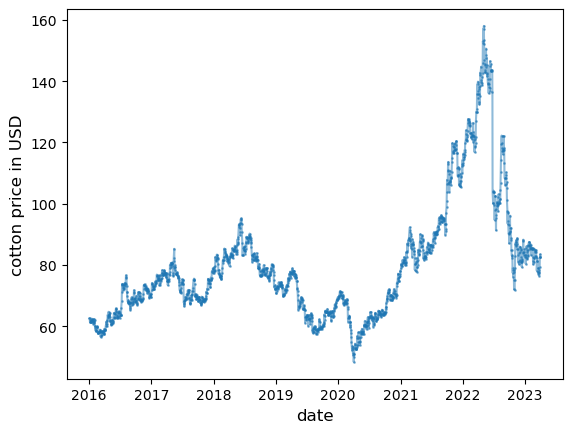

In [4]:
fig, ax = plt.subplots()

ax.plot(s, marker='o', alpha=0.5, ms=1)
ax.set_ylabel('cotton price in USD', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

The figure shows surprisingly large movements in the price of cotton.

What causes these movements?

In general, prices depend on the choices and actions of 

1. suppliers, 
2. consumers, and
3. speculators.

Our focus will be on the interaction between these parties. 

We will connect them together in a dynamic model of supply and demand, called
the *competitive storage model*.

This model was developed by
{cite}`samuelson1971stochastic`,
{cite}`wright1982economic`, {cite}`scheinkman1983simple`,
{cite}`deaton1992on`, {cite}`deaton1996competitive`, and
{cite}`chambers1996theory`.




## The competitive storage model

In the competitive storage model, commodities are assets that

1. can be traded by speculators and
1. have intrinsic value to consumers.

Total demand is the sum of consumer demand and demand by speculators.

Supply is exogenous, depending on "harvests".

```{note}
These days, goods such as basic computer chips and integrated circuits are
often treated as commodities in financial markets, being highly standardized,
and, for these kinds of commodities, the word "harvest" is not
appropriate.

Nonetheless, we maintain it for simplicity.
```

The equilibrium price is determined competitively.

It is a function of the current state (which determines
current harvests and predicts future harvests).



## The model

Consider a market for a single commodity, whose price is given at $t$ by
$p_t$.

The harvest of the commodity at time $t$ is $Z_t$.

We assume that the sequence $\{ Z_t \}_{t \geq 1}$ is IID with common density function $\phi$, where $\phi$ is nonnegative.

Speculators can store the commodity between periods, with $I_t$ units
purchased in the current period yielding $\alpha I_t$ units in the next.

Here the parameter $\alpha \in (0,1)$ is a depreciation rate for the commodity.

For simplicity, the risk free interest rate is taken to be
zero, so expected profit on purchasing $I_t$ units is

$$
  \mathbb{E}_t \, p_{t+1} \cdot \alpha I_t - p_t I_t
   = (\alpha \mathbb{E}_t \, p_{t+1} - p_t) I_t
$$


Here $\mathbb{E}_t \, p_{t+1}$ is the expectation of $p_{t+1}$ taken at time
$t$.



## Equilibrium

In this section we define the equilibrium and discuss how to compute it.

### Equilibrium conditions

Speculators are assumed to be risk neutral, which means that they buy the
commodity whenever expected profits are positive.

As a consequence, if expected profits are positive, then the market is not in
equilibrium.

Hence, to be in equilibrium, prices must satisfy the "no-arbitrage"
condition

$$
  \alpha \mathbb{E}_t \, p_{t+1}  - p_t \leq 0
$$ (eq:arbi)

This means that if the expected price is lower than the current price, there is no room for arbitrage.

Profit maximization gives the additional condition

$$
  \alpha \mathbb{E}_t \, p_{t+1}  - p_t  < 0 \text{ implies } I_t = 0
$$ (eq:pmco)


We also require that the market clears, with supply equaling demand in each period.

We assume that consumers generate demand quantity $D(p)$ corresponding to
price $p$.

Let $P := D^{-1}$ be the inverse demand function.


Regarding quantities,

* supply is the sum of carryover by speculators and the current harvest, and
* demand is the sum of purchases by consumers and purchases by speculators.

Mathematically,

* supply is given by $X_t = \alpha I_{t-1} + Z_t$, which takes values in $S := \mathbb R_+$, while
* demand $ = D(p_t) + I_t$

Thus, the market equilibrium condition is

$$
  \alpha I_{t-1} + Z_t =  D(p_t) + I_t
$$ (eq:mkeq)


The initial condition $X_0 \in S$ is treated as given.




### An equilibrium function

How can we find an equilibrium?

Our path of attack will be to seek a system of prices that depend only on the
current state.

(Our solution method involves using an [ansatz](https://en.wikipedia.org/wiki/Ansatz), which is an educated guess --- in this case for the price function.)

In other words, we take a function $p$ on $S$ and set $p_t = p(X_t)$ for every $t$.

Prices and quantities then follow

$$
  p_t = p(X_t), \quad I_t = X_t - D(p_t), \quad X_{t+1} = \alpha I_t + Z_{t+1}
$$ (eq:eosy)


We choose $p$ so that these prices and quantities satisfy the equilibrium
conditions above.

More precisely, we seek a $p$ such that [](eq:arbi) and [](eq:pmco) hold for
the corresponding system [](eq:eosy).


$$
  p^*(x) = \max
    \left\{
    \alpha \int_0^\infty p^*(\alpha I(x) + z) \phi(z)dz, P(x)
    \right\}
    \qquad (x \in S)
$$ (eq:dopf)

where

$$
  I(x) := x - D(p^*(x))
    \qquad (x \in S)
$$ (eq:einvf)

It turns out that such a $p^*$ will suffice, in the sense that [](eq:arbi)
and [](eq:pmco) hold for the corresponding system [](eq:eosy).

To see this, observe first that

$$
  \mathbb{E}_t \, p_{t+1}
   = \mathbb{E}_t \, p^*(X_{t+1})
   = \mathbb{E}_t \, p^*(\alpha I(X_t) + Z_{t+1})
   = \int_0^\infty p^*(\alpha I(X_t) + z) \phi(z)dz
$$

Thus [](eq:arbi) requires that

$$
   \alpha \int_0^\infty p^*(\alpha I(X_t) + z) \phi(z)dz \leq p^*(X_t)
$$

This inequality is immediate from [](eq:dopf).

Second, regarding [](eq:pmco), suppose that

$$
   \alpha \int_0^\infty p^*(\alpha I(X_t) + z) \phi(z)dz < p^*(X_t)
$$

Then by [](eq:dopf) we have $p^*(X_t) = P(X_t)$

But then $D(p^*(X_t)) = X_t$ and $I_t = I(X_t) = 0$.

As a consequence, both [](eq:arbi) and [](eq:pmco) hold.

We have found an equilibrium, which verifies the ansatz.


### Computing the equilibrium

We now know that an equilibrium can be obtained by finding a function $p^*$
that satisfies [](eq:dopf).

It can be shown that, under mild conditions there is exactly one function on
$S$ satisfying [](eq:dopf).

Moreover, we can compute this function using successive approximation.

This means that we start with a guess of the function and then update it using
[](eq:dopf).

This generates a sequence of functions $p_1, p_2, \ldots$

We continue until this process converges, in the sense that $p_k$ and
$p_{k+1}$ are very close together.

Then we take the final $p_k$ that we computed as our approximation of $p^*$.

To implement our update step, it is helpful if we put [](eq:dopf) and
[](eq:einvf) together.

This leads us to the update rule

$$
  p_{k+1}(x) = \max
    \left\{
    \alpha \int_0^\infty p_k(\alpha ( x - D(p_{k+1}(x))) + z) \phi(z)dz, P(x)
    \right\}
$$ (eq:dopf2)

In other words, we take $p_k$ as given and, at each $x$, solve for $q$ in

$$
  q = \max
    \left\{
    \alpha \int_0^\infty p_k(\alpha ( x - D(q)) + z) \phi(z)dz, P(x)
    \right\}
$$ (eq:dopf3)

Actually we can't do this at every $x$, so instead we do it on a grid of
points $x_1, \ldots, x_n$.

Then we get the corresponding values $q_1, \ldots, q_n$.

Then we compute $p_{k+1}$ as the linear interpolation of
the values $q_1, \ldots, q_n$ over the grid $x_1, \ldots, x_n$.

Then we repeat, seeking convergence.


## Code

The code below implements this iterative process, starting from $p_0 = P$.

The distribution $\phi$ is set to a shifted Beta distribution (although many
other choices are possible).

The integral in [](eq:dopf3) is computed via {ref}`Monte Carlo <monte-carlo>`.

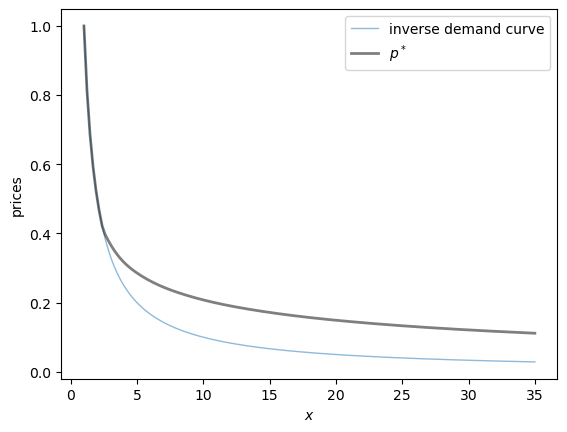

In [5]:
α, a, c = 0.8, 1.0, 2.0
beta_a, beta_b = 5, 5
mc_draw_size = 250
gridsize = 150
grid_max = 35
grid = np.linspace(a, grid_max, gridsize)

beta_dist = beta(5, 5)
Z = a + beta_dist.rvs(mc_draw_size) * c    # Shock observations
D = P = lambda x: 1.0 / x
tol = 1e-4


def T(p_array):

    new_p = np.empty_like(p_array)

    # Interpolate to obtain p as a function.
    p = interp1d(grid,
                 p_array,
                 fill_value=(p_array[0], p_array[-1]),
                 bounds_error=False)

    # Update
    for i, x in enumerate(grid):

        h = lambda q: q - max(α * np.mean(p(α * (x - D(q)) + Z)), P(x))
        new_p[i] = brentq(h, 1e-8, 100)

    return new_p


fig, ax = plt.subplots()

price = P(grid)
ax.plot(grid, price, alpha=0.5, lw=1, label="inverse demand curve")
error = tol + 1
while error > tol:
    new_price = T(price)
    error = max(np.abs(new_price - price))
    price = new_price

ax.plot(grid, price, 'k-', alpha=0.5, lw=2, label=r'$p^*$')
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel("prices")

plt.show()

The figure above shows the inverse demand curve $P$, which is also $p_0$, as
well as our approximation of $p^*$.

Once we have an approximation of $p^*$, we can simulate a time series of
prices.

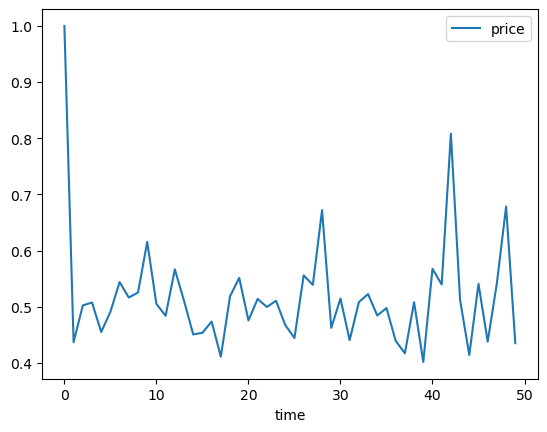

In [6]:
# Turn the price array into a price function
p_star = interp1d(grid,
                  price,
                  fill_value=(price[0], price[-1]),
                  bounds_error=False)

def carry_over(x):
    return α * (x - D(p_star(x)))

def generate_cp_ts(init=1, n=50):
    X = np.empty(n)
    X[0] = init
    for t in range(n-1):
            Z = a + c * beta_dist.rvs()
            X[t+1] = carry_over(X[t]) + Z
    return p_star(X)

fig, ax = plt.subplots()
ax.plot(generate_cp_ts(), label="price")
ax.set_xlabel("time")
ax.legend()
plt.show()